In [56]:
#getting data from quandl

import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [73]:
quandl.ApiConfig.api_key = 'q7SrmZrtPC7YnvUtxs9k'

#getting wiki amazon data
df = quandl.get("WIKI/AAPL")
#only have adjusted close price
df = df[['Adj. Close']]
df

,Adj. Close
Date,
1980-12-12,0.422706
1980-12-15,0.400652
1980-12-16,0.371246
1980-12-17,0.380362
1980-12-18,0.391536
...,...
2018-03-21,171.270000
2018-03-22,168.845000
2018-03-23,164.940000


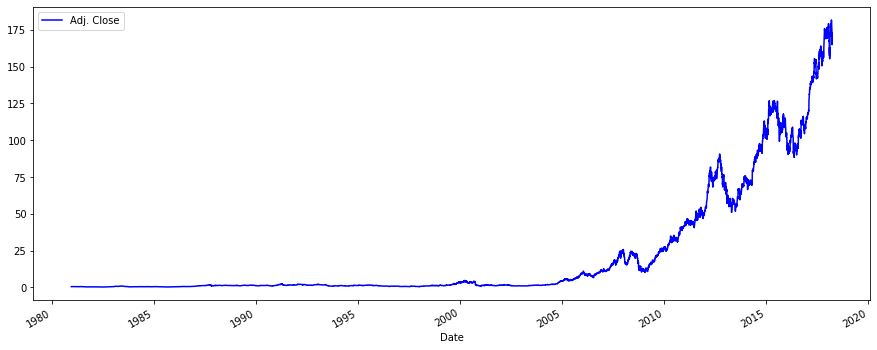

In [74]:
#plot adjusted close price

df['Adj. Close'].plot(figsize=(15,6), color='b')
plt.legend(loc='upper left')
plt.show()

In [75]:
#processed data and created features and labels array 

forecast = 30
df['Prediction'] = df[['Adj. Close']].shift(-forecast)

X = np.array(df.drop(['Prediction'], 1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

y = np.array(df['Prediction'])
y = y[:-forecast]

In [76]:
#created test and trained data set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#fit the model
clf = LinearRegression()
clf.fit(X_train, y_train)

#check accuracy
confidence = clf.score(X_test, y_test)

#predict values
forecast_predicted = clf.predict(X_forecast)

forecast_predicted

array([168.00361442, 171.09864988, 176.8392767 , 176.26725694,
       175.67480791, 174.87806611, 176.4409058 , 179.45933146,
       182.9476305 , 182.35518147, 182.07938623, 178.89241903,
       180.12839028, 180.75148323, 180.59826365, 178.92306294,
       180.87405889, 183.97930899, 185.75665608, 183.96909435,
       182.40625466, 182.62076207, 181.97723985, 179.19885818,
       179.13757035, 175.08235888, 172.60530905, 168.61649273,
       176.61455465, 172.08946981])

(17282.0, 17647.0)

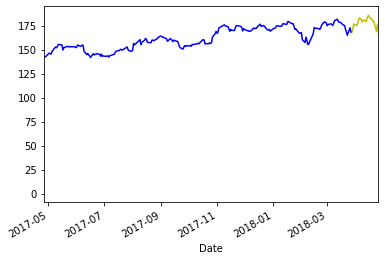

In [78]:
#plot prediction
dates = pd.date_range(start = "2018-03-28", end="2018-04-26")
plt.plot(dates,forecast_predicted, color = 'y')
df['Adj. Close'].plot(color='b')
plt.xlim(xmin=datetime.date(2017,4,26), xmax=datetime.date(2018,4,26))